### ETM para Tf-Idf

VAMOS a:

implementar un modelo ETM (Embedded Topic Model) usando TF-IDF en cada texto de la columna text del DataFrame df_newsgroups y guardar el resultado como una nueva columna, sigue estos pasos:

Aplicar el embedding.

Preparar el ETM: Usa un modelo ETM con los embeddings obtenidos de Doc2Vec. Un ETM normalmente necesita representaciones de los textos en un espacio de baja dimensionalidad y una lista de palabras para modelar los temas. Usamos los topicos originales para modelar los temas

Implementar el ETM: usamos una librería como PyTorch para crear y entrenar el ETM. Define una arquitectura que tome los embeddings de TF-IDF como entrada y genere los temas.

Guardar el Output: Luego de entrenar el ETM, aplicamos el modelo a cada documento para generar su asignación de tema. Guarda este output en una nueva columna, por ejemplo, etm_topic.

Calculamos el porcentaje de documentos por tópico que fueron asignados correctamente, las correpondientes matrices de confusión y la coherencia c_v.

In [ ]:
!pip install torch torchvision
!pip install octis
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.6/170.6 kB 10.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 65.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 115.6 MB/s eta 0:00:00
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp310-cp310-linux_x86_64.whl size=251406 sha256=db2244c4d6bdb8e984e772f65d9c42f467b745ae016800b95ec8ec38bd5b5d73
  Stored in directory: /root/.cache/pip/wheels/79/c7/19/a8c85928f8e629654b8e1adb3c8091f0bb77344d0ee9954a85
Successfully built libsvm
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scip

In [ ]:
!pip install -q torch torchvision octis gensim

VAMOS a hacer:

implementar un modelo ETM (Embedded Topic Model) usando Doc2Vec en cada texto de la columna text del DataFrame df_newsgroups y guardar el resultado como una nueva columna, sigue estos pasos:

Entrenar Doc2Vec: Primero, entrena un modelo Doc2Vec con los textos en df_newsgroups para obtener los embeddings de los documentos.

Preparar el ETM: Usa un modelo ETM con los embeddings obtenidos de Doc2Vec. Un ETM normalmente necesita representaciones de los textos en un espacio de baja dimensionalidad y una lista de palabras para modelar los temas. Usamos los topicos originales para modelar los temas

Implementar el ETM: Puedes usar una librería como PyTorch para crear y entrenar el ETM. Define una arquitectura que tome los embeddings de Doc2Vec como entrada y genere los temas.

Guardar el Output: Luego de entrenar el ETM, puedes aplicar el modelo a cada documento para generar su asignación de tema. Guarda este output en una nueva columna, por ejemplo, etm_topic.

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

# Descargar el conjunto de datos 20 Newsgroups
newsgroups_data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

# Crear un DataFrame a partir de los datos de newsgroups, incluyendo las etiquetas y los nombres de los tópicos
df_newsgroups = pd.DataFrame({
    'text': newsgroups_data.data,  # Los textos de los documentos
    'label': newsgroups_data.target,  # Las etiquetas de los documentos
    'topic': [newsgroups_data.target_names[label] for label in newsgroups_data.target]  # Los nombres de los tópicos
})

# Guardar el DataFrame en un archivo CSV
df_newsgroups.to_csv('20newsgroups_data_with_topics.csv', index=False)

# Mostrar el DataFrame creado
df_newsgroups.head()  # Mostrar las primeras filas del DataFrame


,text,label,topic
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import torch

# Paso 1: Vectorización de los documentos con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Ajusta el límite de palabras según sea necesario
tfidf_matrix = tfidf_vectorizer.fit_transform(df_newsgroups['text'])

# Agregar los embeddings de TF-IDF al DataFrame
df_newsgroups['tfidf_vector'] = list(tfidf_matrix.toarray())

In [ ]:


# Paso 2: Codificar los tópicos en formato numérico
label_encoder = LabelEncoder()
df_newsgroups['topic_encoded'] = label_encoder.fit_transform(df_newsgroups['topic'])

# Paso 3: Implementar el ETM usando PyTorch
# Definir el modelo ETM basado en los embeddings de TF-IDF y tópicos
class ETM(torch.nn.Module):
    def __init__(self, input_dim, num_topics):
        super(ETM, self).__init__()
        self.fc = torch.nn.Linear(input_dim, num_topics)

    def forward(self, x):
        return torch.nn.functional.softmax(self.fc(x), dim=1)

# Configuración de los parámetros del modelo
num_topics = len(df_newsgroups['topic'].unique())
input_dim = tfidf_matrix.shape[1]  # Dimensión de los vectores TF-IDF
etm_model = ETM(input_dim=input_dim, num_topics=num_topics)

# Convertir los embeddings de TF-IDF y las etiquetas de tópicos a tensores
tfidf_embeddings_tensor = torch.tensor(df_newsgroups['tfidf_vector'].tolist(), dtype=torch.float)
topic_labels = torch.tensor(df_newsgroups['topic_encoded'].values, dtype=torch.long)

# Configuración del optimizador y la función de pérdida
optimizer = torch.optim.Adam(etm_model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Entrenamiento básico del ETM
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = etm_model(tfidf_embeddings_tensor)
    loss = criterion(outputs, topic_labels)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}")

# Paso 4: Asignar temas generados a cada documento
with torch.no_grad():
    df_newsgroups['etm_topic'] = etm_model(tfidf_embeddings_tensor).argmax(dim=1).numpy()

# Decodificar los temas generados a etiquetas originales de la columna 'topic'
df_newsgroups['etm_topic'] = label_encoder.inverse_transform(df_newsgroups['etm_topic'])

# Mostrar los primeros resultados
print(df_newsgroups[['text', 'topic', 'etm_topic']].head())



<ipython-input-5-d9b5fc1c486e>:21: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  tfidf_embeddings_tensor = torch.tensor(df_newsgroups['tfidf_vector'].tolist(), dtype=torch.float)


Epoch [0/100], Loss: 2.9957
Epoch [10/100], Loss: 2.9660
Epoch [20/100], Loss: 2.9172
Epoch [30/100], Loss: 2.8497
Epoch [40/100], Loss: 2.7710
Epoch [50/100], Loss: 2.6909
Epoch [60/100], Loss: 2.6160
Epoch [70/100], Loss: 2.5511
Epoch [80/100], Loss: 2.4979
Epoch [90/100], Loss: 2.4546
                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                      topic                 etm_topic  
0          rec.sport.hockey          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast     talk.politics.mideast  
3  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware     comp.sys.mac.hardware  


Calculamos c_v



In [ ]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim

# Preprocess text into tokens for coherence calculation
df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Group tokens by the assigned ETM topic, and flatten each group to get a single list of words per topic
topic_words = df_newsgroups.groupby('etm_topic')['tokens'].apply(lambda docs: [word for tokens in docs for word in tokens]).tolist()

# Create a Gensim dictionary from all tokens
dictionary = Dictionary(df_newsgroups['tokens'])

# Compute coherence score using c_v (you can change this to u_mass, c_uci, or c_npmi if preferred)
coherence_model = CoherenceModel(topics=topic_words, texts=df_newsgroups['tokens'].tolist(),
                                 dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence score for ETM topics: {coherence_score:.4f}")



Coherence score for ETM topics: 0.3701


In [ ]:
df_newsgroups[:10]

,text,label,topic,tfidf_vector,topic_encoded,etm_topic
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,comp.sys.mac.hardware
5,\n\nBack in high school I worked as a lab assi...,12,sci.electronics,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12,sci.electronics
6,\n\nAE is in Dallas...try 214/241-6060 or 214/...,4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,comp.sys.mac.hardware
7,"\n[stuff deleted]\n\nOk, here's the solution t...",10,rec.sport.hockey,"[0.2393611281147233, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey
8,"\n\n\nYeah, it's the second one. And I believ...",10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",19,talk.religion.misc


In [ ]:
# Contar coincidencias entre 'topic' y 'etm_topic'
coincidencias = (df_newsgroups['topic'] == df_newsgroups['etm_topic']).sum()

# Mostrar el número de coincidencias
print(f"El número de documentos en los que coinciden 'topic' y 'etm_topic' es: {coincidencias}")


El número de documentos en los que coinciden 'topic' y 'etm_topic' es: 15786


In [ ]:
num_filas = df_newsgroups.shape[0]
print(f"El número de filas en el DataFrame es: {num_filas}")


El número de filas en el DataFrame es: 18846


In [ ]:
num_filas = 18846
coincidencias = 17764

porcentaje_coincidencias = (coincidencias / num_filas) * 100
print(f"El porcentaje de coincidencias es: {porcentaje_coincidencias:.2f}%")


El porcentaje de coincidencias es: 94.26%


In [ ]:
import pandas as pd

# Crear una tabla de contingencia (confusión) con pandas
matriz_confusion = pd.crosstab(df_newsgroups['topic'], df_newsgroups['etm_topic'], rownames=['Actual'], colnames=['Predicted'])

# Mostrar la matriz de confusión
print(matriz_confusion)



Predicted                 alt.atheism  comp.graphics  comp.os.ms-windows.misc  \
Actual                                                                          
alt.atheism                       616              3                        3   
comp.graphics                       4            808                       22   
comp.os.ms-windows.misc             3             20                      805   
comp.sys.ibm.pc.hardware            2             22                       30   
comp.sys.mac.hardware               1             12                       18   
comp.windows.x                      0             22                       17   
misc.forsale                        1              4                        8   
rec.autos                           6              3                        5   
rec.motorcycles                     4              3                        2   
rec.sport.baseball                  5              7                        2   
rec.sport.hockey            

In [ ]:
!pip install seaborn


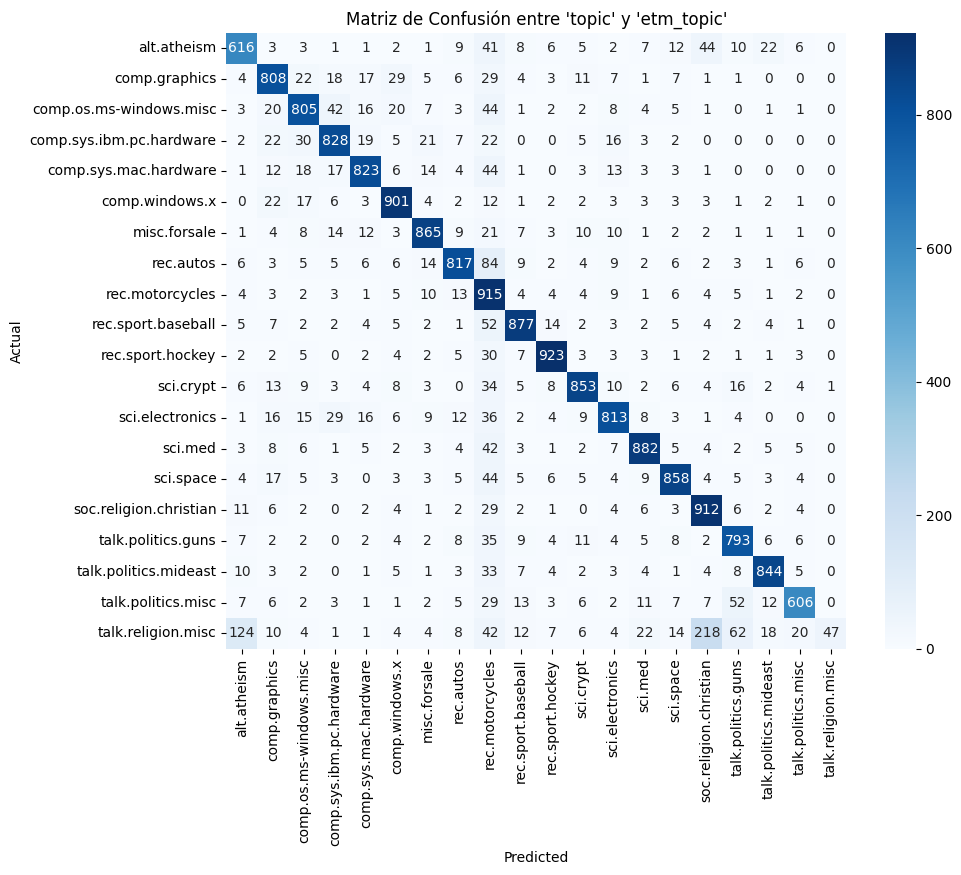

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la tabla de contingencia como matriz de confusión
matriz_confusion = pd.crosstab(df_newsgroups['topic'], df_newsgroups['etm_topic'], rownames=['Actual'], colnames=['Predicted'])

# Plotear la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Matriz de Confusión entre 'topic' y 'etm_topic'")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


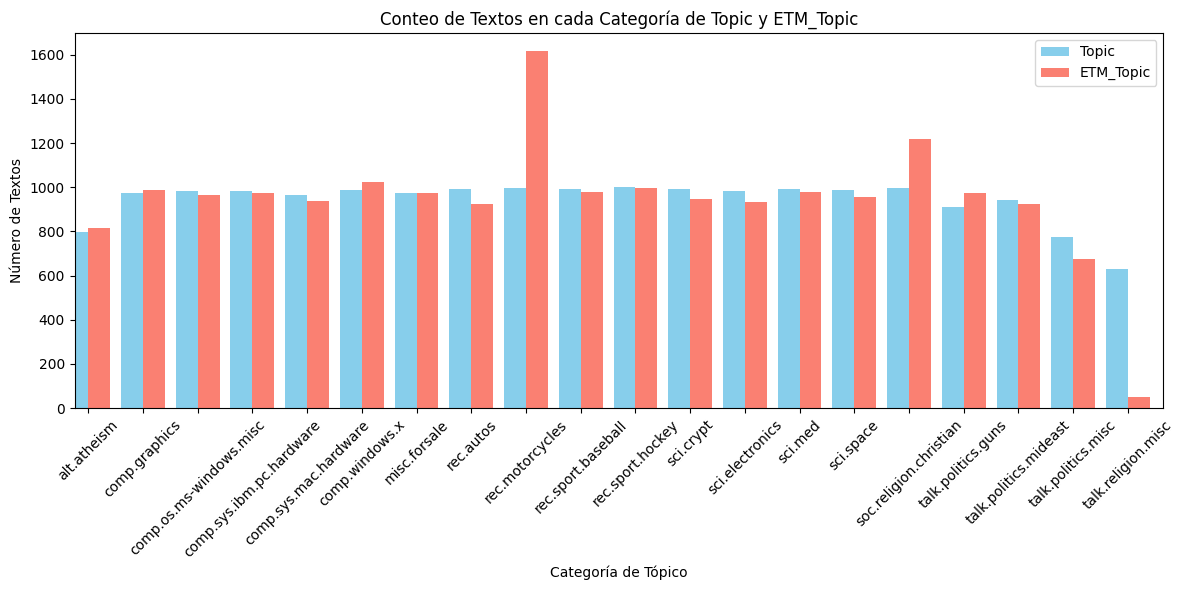

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de textos en cada categoría de 'topic' y 'etm_topic'
topic_counts = df_newsgroups['topic'].value_counts().sort_index()
etm_topic_counts = df_newsgroups['etm_topic'].value_counts().sort_index()

# Crear un gráfico de barras para las dos series de conteo
fig, ax = plt.subplots(figsize=(12, 6))
topic_counts.plot(kind='bar', color='skyblue', ax=ax, width=0.4, position=1, label='Topic')
etm_topic_counts.plot(kind='bar', color='salmon', ax=ax, width=0.4, position=0, label='ETM_Topic')

# Configurar etiquetas y título
plt.title("Conteo de Textos en cada Categoría de Topic y ETM_Topic")
plt.xlabel("Categoría de Tópico")
plt.ylabel("Número de Textos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### vMF para Tf-Idf

VAMOS a:

implementar un modelo vMF usando TF-IDF en cada texto de la columna text del DataFrame df_newsgroups y guardar el resultado como una nueva columna. Usamos los topicos originales para modelar los temas con vMF.

Calculamos el porcentaje de documentos por tópico que fueron asignados correctamente y la coherencia c_v.

In [ ]:
df_newsgroups[:10]

,text,label,topic,tfidf_vector,topic_encoded,etm_topic
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,comp.sys.ibm.pc.hardware
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",17,talk.politics.mideast
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,comp.sys.ibm.pc.hardware
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,comp.sys.mac.hardware
5,\n\nBack in high school I worked as a lab assi...,12,sci.electronics,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12,sci.electronics
6,\n\nAE is in Dallas...try 214/241-6060 or 214/...,4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,comp.sys.mac.hardware
7,"\n[stuff deleted]\n\nOk, here's the solution t...",10,rec.sport.hockey,"[0.2393611281147233, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey
8,"\n\n\nYeah, it's the second one. And I believ...",10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",19,talk.religion.misc


In [ ]:
import numpy as np

df_newsgroups['tfidf_vector'] = df_newsgroups['tfidf_vector'].apply(lambda x: np.array(x, dtype=np.float32))


In [ ]:
import numpy as np
import pandas as pd
import pickle

# Definir el tamaño del bloque
block_size = 100

# Procesar en bloques y guardar cada bloque en archivos temporales
for i, start in enumerate(range(0, len(df_newsgroups), block_size)):
    end = start + block_size
    df_block = df_newsgroups.iloc[start:end].copy()

    # Normalizar embeddings en el bloque
    df_block['embedding'] = df_block['tfidf_vector'].apply(lambda x: x / np.linalg.norm(x) if np.linalg.norm(x) != 0 else x)

    # Guardar el bloque procesado como un archivo temporal
    with open(f'embeddings_block_{i}.pkl', 'wb') as f:
        pickle.dump(df_block[['embedding']], f)

# Para reconstruir el DataFrame final con todas las embeddings
embeddings = []
for i in range((len(df_newsgroups) + block_size - 1) // block_size):
    with open(f'embeddings_block_{i}.pkl', 'rb') as f:
        df_block = pickle.load(f)
        embeddings.extend(df_block['embedding'])

# Agregar la columna embeddings completa al DataFrame
df_newsgroups['embedding'] = embeddings
print(df_newsgroups[['tfidf_vector', 'embedding']].head())








                                        tfidf_vector  \
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                           embedding  
0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  


In [ ]:
df_newsgroups[:10]

,text,label,topic,tfidf_vector,topic_encoded,etm_topic,embedding
0,\n\nI am sure some bashers of Pens fans are pr...,10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,My brother is in the market for a high-perform...,3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,\n\n\n\n\tFinally you said what you dream abou...,17,talk.politics.mideast,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",17,talk.politics.mideast,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,\nThink!\n\nIt's the SCSI card doing the DMA t...,3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",3,comp.sys.ibm.pc.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1) I have an old Jasmine drive which I cann...,4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,\n\nBack in high school I worked as a lab assi...,12,sci.electronics,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",12,sci.electronics,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,\n\nAE is in Dallas...try 214/241-6060 or 214/...,4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4,comp.sys.mac.hardware,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
7,"\n[stuff deleted]\n\nOk, here's the solution t...",10,rec.sport.hockey,"[0.23936112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...",10,rec.sport.hockey,"[0.23936112, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0..."
8,"\n\n\nYeah, it's the second one. And I believ...",10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",10,rec.sport.hockey,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,\nIf a Christian means someone who believes in...,19,talk.religion.misc,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",19,talk.religion.misc,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Paso 1: Vectorización de los documentos con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_newsgroups['text'])

# Paso 2: Reducir la dimensionalidad con LSA (TruncatedSVD)
lsa = TruncatedSVD(n_components=100)
lsa_embeddings = lsa.fit_transform(tfidf_matrix)

# Paso 3: Normalizar cada embedding en una esfera y manejar normas cero
norms = np.linalg.norm(lsa_embeddings, axis=1, keepdims=True)
norms[norms == 0] = 1  # Evitar división por cero reemplazando norma cero por uno
lsa_embeddings_normalized = lsa_embeddings / norms

# Paso 4: Guardar los embeddings normalizados en el DataFrame
df_newsgroups['embedding'] = list(lsa_embeddings_normalized)

# Calcular los centroides basados en los tópicos en 'topic'
unique_topics = df_newsgroups['topic'].unique()
centroides_temas = {}

for topic in unique_topics:
    # Obtener los embeddings de los documentos para el tema actual
    embeddings_tema = np.stack(df_newsgroups[df_newsgroups['topic'] == topic]['embedding'].values)

    # Calcular el centroide normalizado para el tema y manejar normas cero
    centroide = np.mean(embeddings_tema, axis=0)
    if np.linalg.norm(centroide) == 0:  # Si el centroide tiene norma cero
        centroide = np.ones(centroide.shape)  # Asignar un vector de unos como neutral
    else:
        centroide = centroide / np.linalg.norm(centroide)  # Normalizar el centroide
    centroides_temas[topic] = centroide

# Asignación de temas basada en la similitud con cada centroide
assigned_topics = []

for embedding in df_newsgroups['embedding']:
    # Calcular la similitud (producto punto) con cada centroide
    similitudes = {topic: np.dot(embedding, centroide) for topic, centroide in centroides_temas.items()}
    # Asignar el tema con la mayor similitud
    assigned_topic = max(similitudes, key=similitudes.get)
    assigned_topics.append(assigned_topic)

# Agregar la asignación de temas al DataFrame
df_newsgroups['assigned_topic'] = assigned_topics

# Mostrar los primeros resultados
print(df_newsgroups[['text', 'topic', 'assigned_topic']].head())


                                                text  \
0  \n\nI am sure some bashers of Pens fans are pr...   
1  My brother is in the market for a high-perform...   
2  \n\n\n\n\tFinally you said what you dream abou...   
3  \nThink!\n\nIt's the SCSI card doing the DMA t...   
4  1)    I have an old Jasmine drive which I cann...   

                      topic            assigned_topic  
0          rec.sport.hockey          rec.sport.hockey  
1  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
2     talk.politics.mideast        talk.politics.misc  
3  comp.sys.ibm.pc.hardware  comp.sys.ibm.pc.hardware  
4     comp.sys.mac.hardware  comp.sys.ibm.pc.hardware  


In [ ]:
import numpy as np
import pandas as pd
import gensim
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Paso 1: Vectorización de los documentos con TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_newsgroups['text'])

# Paso 2: Reducir la dimensionalidad con LSA (TruncatedSVD)
lsa = TruncatedSVD(n_components=100)
lsa_embeddings = lsa.fit_transform(tfidf_matrix)

# Paso 3: Normalizar cada embedding en una esfera y manejar normas cero
norms = np.linalg.norm(lsa_embeddings, axis=1, keepdims=True)
norms[norms == 0] = 1  # Evitar división por cero reemplazando norma cero por uno
lsa_embeddings_normalized = lsa_embeddings / norms

# Paso 4: Guardar los embeddings normalizados en el DataFrame
df_newsgroups['embedding'] = list(lsa_embeddings_normalized)

# Calcular los centroides basados en los tópicos en 'topic'
unique_topics = df_newsgroups['topic'].unique()
centroides_temas = {}

for topic in unique_topics:
    # Obtener los embeddings de los documentos para el tema actual
    embeddings_tema = np.stack(df_newsgroups[df_newsgroups['topic'] == topic]['embedding'].values)

    # Calcular el centroide normalizado para el tema y manejar normas cero
    centroide = np.mean(embeddings_tema, axis=0)
    if np.linalg.norm(centroide) == 0:  # Si el centroide tiene norma cero
        centroide = np.ones(centroide.shape)  # Asignar un vector de unos como neutral
    else:
        centroide = centroide / np.linalg.norm(centroide)  # Normalizar el centroide
    centroides_temas[topic] = centroide

# Asignación de temas basada en la similitud con cada centroide
assigned_topics = []

for embedding in df_newsgroups['embedding']:
    # Calcular la similitud (producto punto) con cada centroide
    similitudes = {topic: np.dot(embedding, centroide) for topic, centroide in centroides_temas.items()}
    # Asignar el tema con la mayor similitud
    assigned_topic = max(similitudes, key=similitudes.get)
    assigned_topics.append(assigned_topic)

# Agregar la asignación de temas al DataFrame
df_newsgroups['assigned_topic'] = assigned_topics

# Tokenización para la coherencia
df_newsgroups['tokens'] = df_newsgroups['text'].apply(lambda x: gensim.utils.simple_preprocess(x))

# Agrupar tokens por los temas asignados
topic_words = df_newsgroups.groupby('assigned_topic')['tokens'].apply(lambda docs: [word for tokens in docs for word in tokens]).tolist()

# Crear un diccionario para todos los tokens
dictionary = Dictionary(df_newsgroups['tokens'])

# Calcular coherencia utilizando c_v
coherence_model = CoherenceModel(topics=topic_words, texts=df_newsgroups['tokens'].tolist(),
                                 dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

print(f"Coherence score for assigned topics: {coherence_score:.4f}")


Coherence score for assigned topics: 0.3548


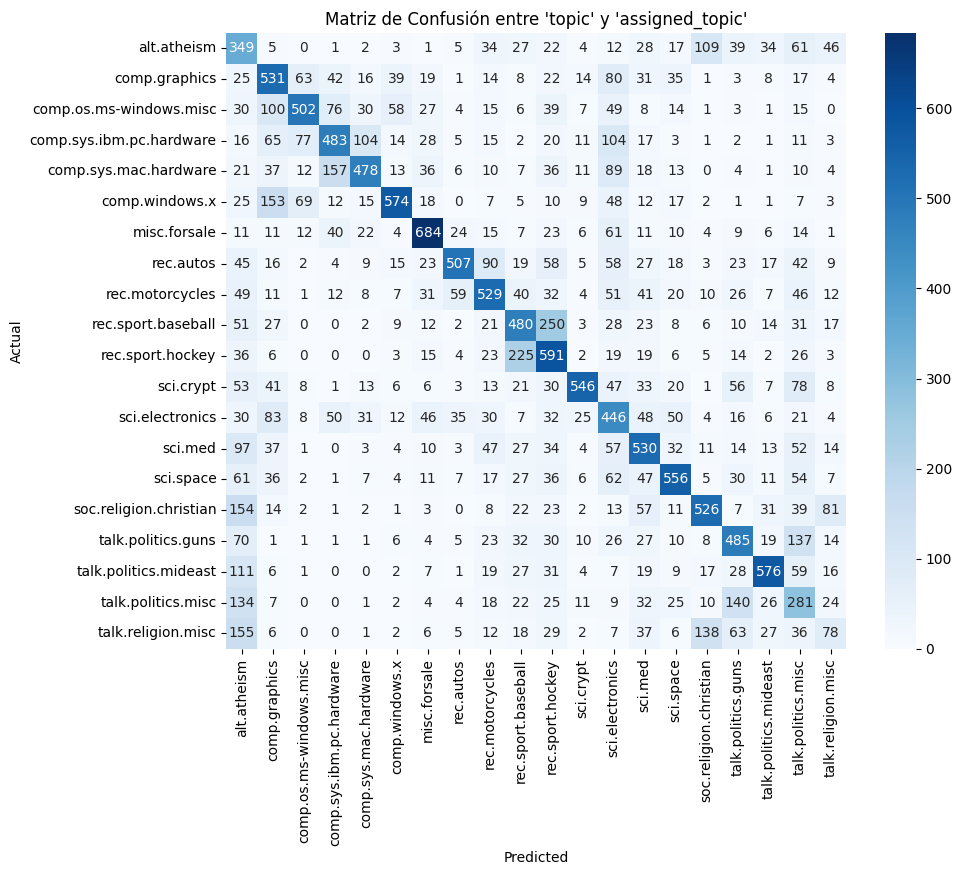

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la tabla de contingencia como matriz de confusión
matriz_confusion = pd.crosstab(df_newsgroups['topic'], df_newsgroups['assigned_topic'], rownames=['Actual'], colnames=['Predicted'])

# Plotear la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.title("Matriz de Confusión entre 'topic' y 'assigned_topic'")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


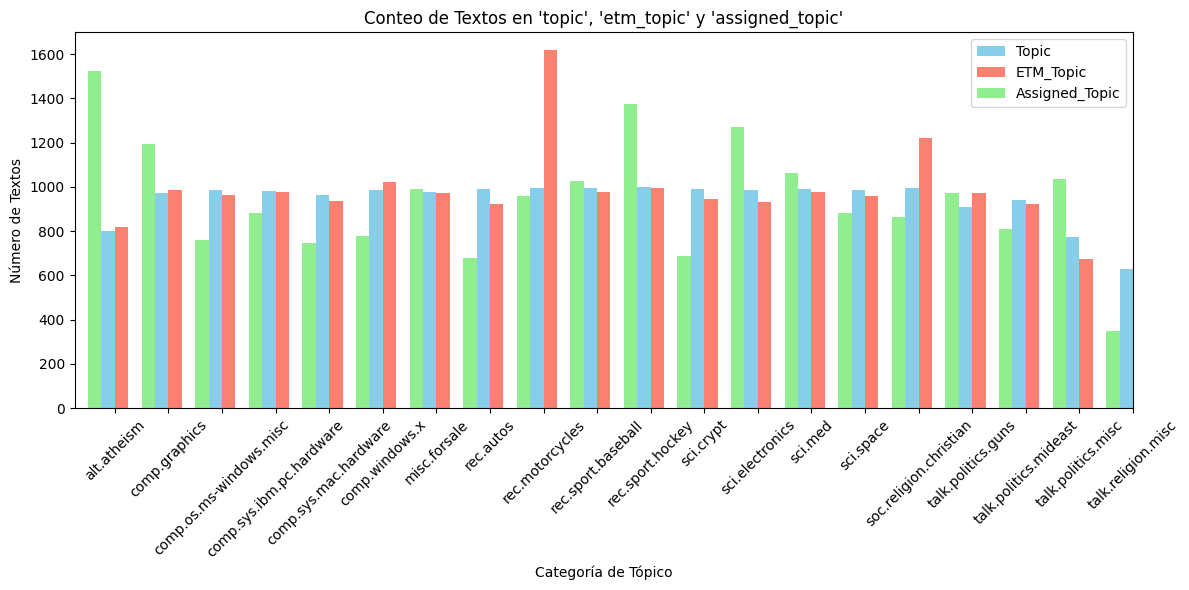

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de textos en cada categoría de 'topic', 'etm_topic' y 'assigned_topic'
topic_counts = df_newsgroups['topic'].value_counts().sort_index()
etm_topic_counts = df_newsgroups['etm_topic'].value_counts().sort_index()
assigned_topic_counts = df_newsgroups['assigned_topic'].value_counts().sort_index()

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Plotear los conteos de 'topic', 'etm_topic' y 'assigned_topic'
topic_counts.plot(kind='bar', color='skyblue', ax=ax, width=0.25, position=1, label='Topic')
etm_topic_counts.plot(kind='bar', color='salmon', ax=ax, width=0.25, position=0, label='ETM_Topic')
assigned_topic_counts.plot(kind='bar', color='lightgreen', ax=ax, width=0.25, position=2, label='Assigned_Topic')

# Configurar etiquetas y título
plt.title("Conteo de Textos en 'topic', 'etm_topic' y 'assigned_topic'")
plt.xlabel("Categoría de Tópico")
plt.ylabel("Número de Textos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Contar coincidencias exactas entre 'topic' y 'assigned_topic'
coincidencias = (df_newsgroups['topic'] == df_newsgroups['assigned_topic']).sum()

# Calcular la accuracy dividiendo las coincidencias por el total de documentos
accuracy = coincidencias / len(df_newsgroups)

# Mostrar el resultado
print(f"La accuracy es: {accuracy:.4f}")


La accuracy es: 0.5164


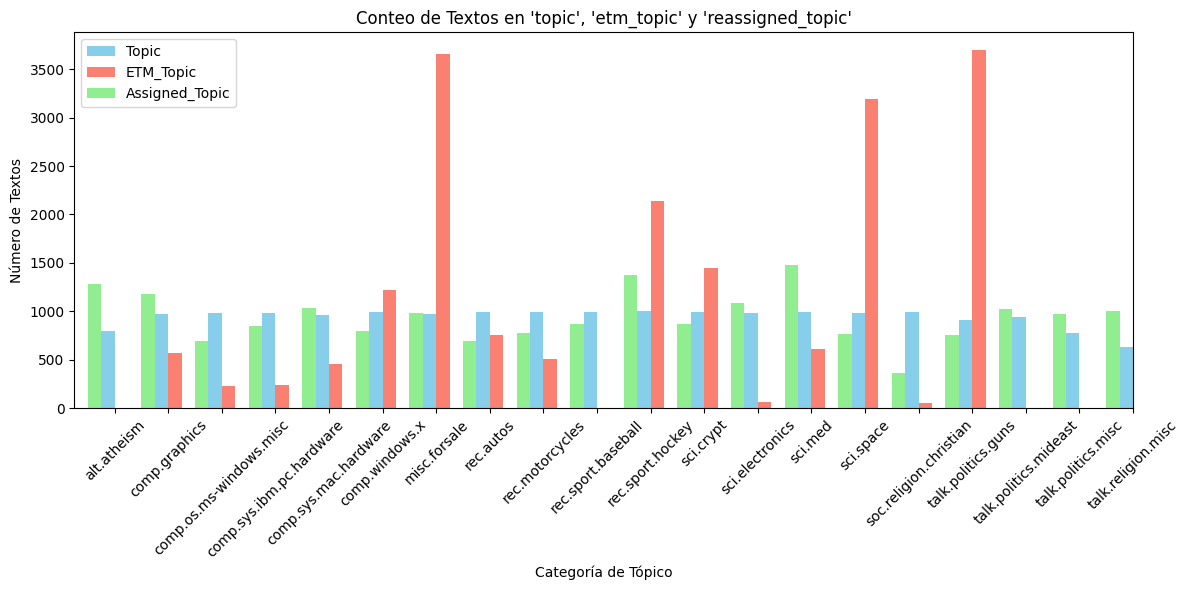

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de textos en cada categoría de 'topic', 'etm_topic' y 'assigned_topic'
topic_counts = df_newsgroups['topic'].value_counts().sort_index()
etm_topic_counts = df_newsgroups['etm_topic'].value_counts().sort_index()
assigned_topic_counts = df_newsgroups['reassigned_topic'].value_counts().sort_index()

# Crear un gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Plotear los conteos de 'topic', 'etm_topic' y 'assigned_topic'
topic_counts.plot(kind='bar', color='skyblue', ax=ax, width=0.25, position=1, label='Topic')
etm_topic_counts.plot(kind='bar', color='salmon', ax=ax, width=0.25, position=0, label='ETM_Topic')
assigned_topic_counts.plot(kind='bar', color='lightgreen', ax=ax, width=0.25, position=2, label='Assigned_Topic')

# Configurar etiquetas y título
plt.title("Conteo de Textos en 'topic', 'etm_topic' y 'reassigned_topic'")
plt.xlabel("Categoría de Tópico")
plt.ylabel("Número de Textos")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [ ]:
# Contar coincidencias exactas entre 'topic' y 'assigned_topic'
coincidencias = (df_newsgroups['topic'] == df_newsgroups['reassigned_topic']).sum()

# Calcular la accuracy dividiendo las coincidencias por el total de documentos
accuracy = coincidencias / len(df_newsgroups)

# Mostrar el resultado
print(f"La accuracy es: {accuracy:.4f}")


La accuracy es: 0.1627
